In [1]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('one-hot-encoded-everything.csv')

In [4]:
#df['genre'] =  df['genre'].astype('category')

In [5]:
#df['style'] = df['style'].astype('category')

In [6]:
df_small = df.drop('track_id', axis=1).iloc[:100000]

In [7]:
df_dummies = pd.get_dummies(df_small)

In [8]:
tree = NearestNeighbors(algorithm='ball_tree').fit(df_dummies.iloc[:-1])

In [9]:
df.iloc[[-1]]

,track_id,duration,end_of_fade_in,key_confidence,loudness,mode_confidence,start_of_fade_out,tempo,time_signature_confidence,artist_familiarity,...,genre_Vocal,new_genre,style_Classical,style_EDM,style_Folk,style_Hip_Hop,style_Metal,style_Pop,style_Punk,style_Rock
273933,TRYDYLS128F42BCDDB,351.50322,0.129,0.993,-14.817,0.805,346.749,102.861,0.076,0.572501,...,0,7,1,0,0,0,0,0,0,0


In [57]:
def plot_two(one, two, index, title='', i=0):
    if type(index) is not list:
        index = [index]
    fig = plt.figure()
    fig, ax = plt.subplots()
    if type(i) is not list:
        i = [i]
        
    for x in i:
        df.iloc[hundred[x]][[one, two]].set_index(one).plot(style='.', color='gray', ax=ax, label='hundred closest', legend=False)
        df.iloc[ten[x]][[one, two]].set_index(one).plot(style='.', color='blue', ax=ax, label='ten closest', legend=False)
        df.iloc[index][[one, two]].set_index(one).plot(style='.', color='red', ax=ax, legend=False)
    plt.title(title + '\n' + 'K nearest neighbors from ball_tree\nBlue = 10 nearest\nGray = 100 nearest')
    plt.ylabel(two)

<Figure size 432x288 with 0 Axes>

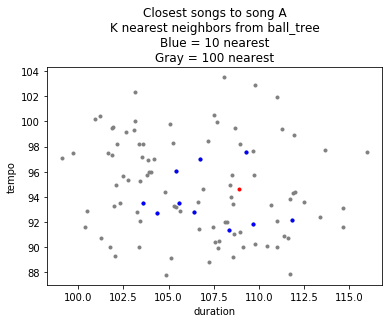

<Figure size 432x288 with 0 Axes>

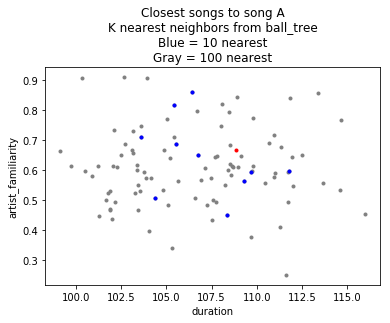

<Figure size 432x288 with 0 Axes>

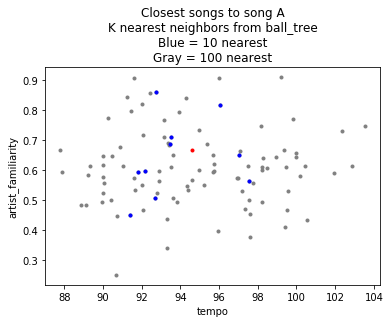

In [58]:
_, ten = tree.kneighbors(df_dummies.iloc[[-1]], n_neighbors=10)
_, hundred = tree.kneighbors(df_dummies.iloc[[-1]], n_neighbors=100)
plot_two('duration', 'tempo', index=99999, title='Closest songs to song A')
plt.savefig('a1.png')
plot_two('duration', 'artist_familiarity', index=99999, title='Closest songs to song A')
plt.savefig('a2.png')
plot_two('tempo', 'artist_familiarity', index=99999, title='Closest songs to song A')
plt.savefig('a3.png')

<Figure size 432x288 with 0 Axes>

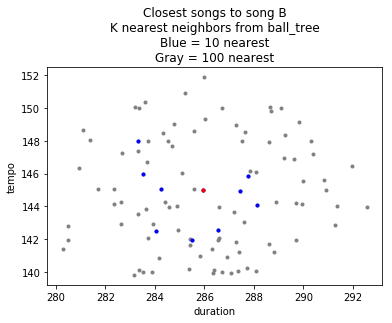

<Figure size 432x288 with 0 Axes>

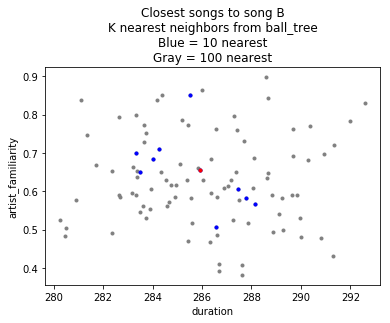

<Figure size 432x288 with 0 Axes>

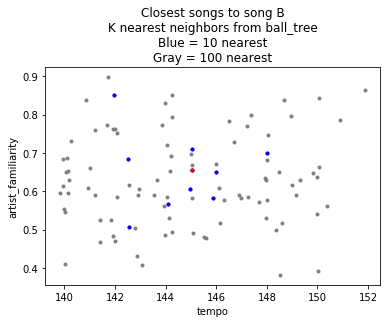

In [59]:
_, ten = tree.kneighbors(df_dummies.iloc[[-2]], n_neighbors=10)
_, hundred = tree.kneighbors(df_dummies.iloc[[-2]], n_neighbors=100)
plot_two('duration', 'tempo', index=99998, title='Closest songs to song B')
plt.savefig('b1.png')
plot_two('duration', 'artist_familiarity', index=99998, title='Closest songs to song B')
plt.savefig('b2.png')
plot_two('tempo', 'artist_familiarity', index=99998, title='Closest songs to song B')
plt.savefig('b3.png')

In [60]:
import numpy as np


<Figure size 432x288 with 0 Axes>

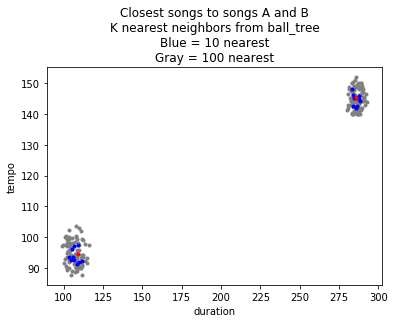

<Figure size 432x288 with 0 Axes>

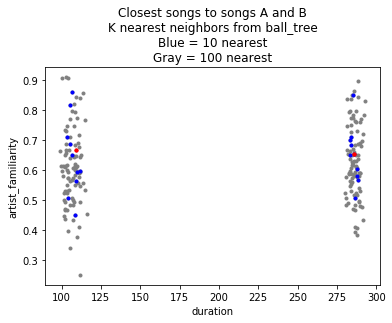

<Figure size 432x288 with 0 Axes>

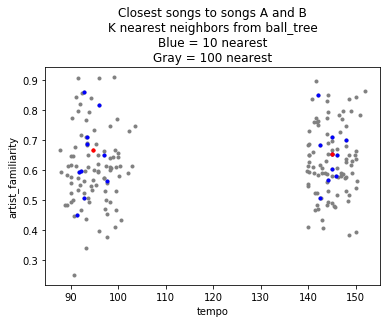

In [63]:
_, ten = tree.kneighbors(df_dummies.iloc[[99998, 99999]], n_neighbors=10)
_, hundred = tree.kneighbors(df_dummies.iloc[[99998, 99999]], n_neighbors=100)
i = [0,1]
plot_two('duration', 'tempo', index=[99998, 99999], title='Closest songs to songs A and B', i=i)
plt.savefig('ab1.png')
plot_two('duration', 'artist_familiarity', index=[99998, 99999], title='Closest songs to songs A and B', i=i)
plt.savefig('ab2.png')
plot_two('tempo', 'artist_familiarity', index=[99998, 99999], title='Closest songs to songs A and B', i=i)
plt.savefig('ab3.png')